# Exoloratory data analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
churn_data = pd.read_csv(r"C:\Users\admin\Downloads\Telco-Customer-Churn.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data=churn_data.drop(columns=["customerID",'gender','SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
data.columns

Index(['tenure', 'PhoneService', 'OnlineBackup', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   OnlineBackup    7043 non-null   object 
 3   MonthlyCharges  7043 non-null   float64
 4   TotalCharges    7043 non-null   object 
 5   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 330.3+ KB


In [7]:
data.isnull().sum()

tenure            0
PhoneService      0
OnlineBackup      0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

Visualize data distributions

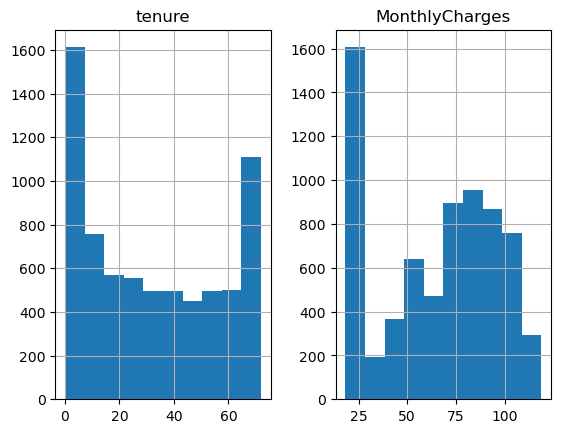

In [8]:
data.hist(["tenure","MonthlyCharges"])
plt.show()


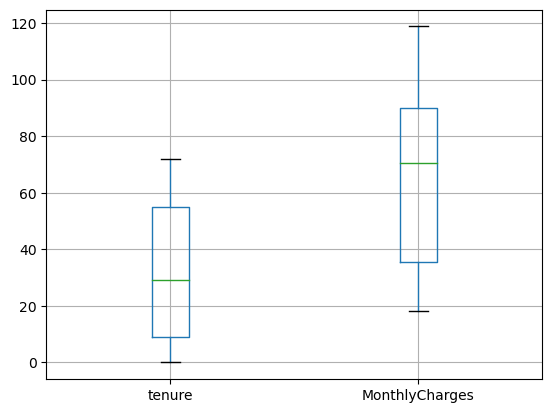

In [9]:
data.boxplot(["tenure", "MonthlyCharges"])
plt.show()

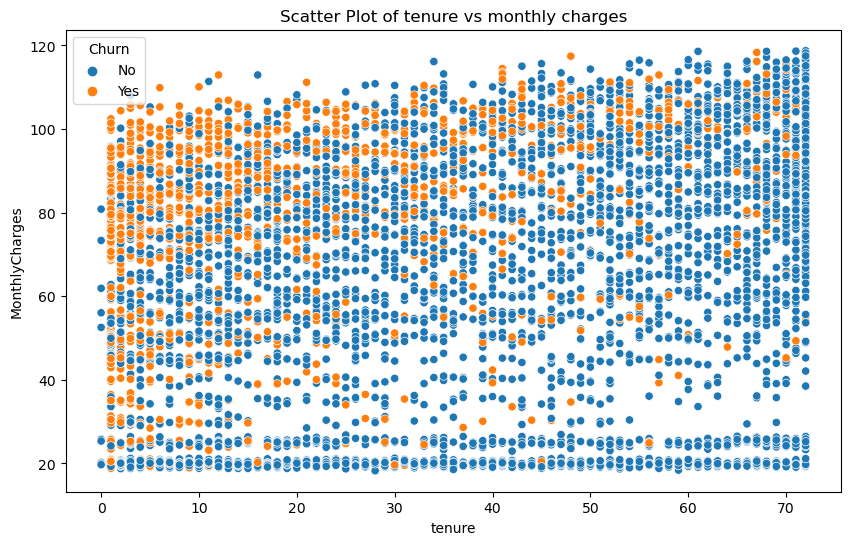

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue="Churn", data=data)
plt.title('Scatter Plot of tenure vs monthly charges')
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


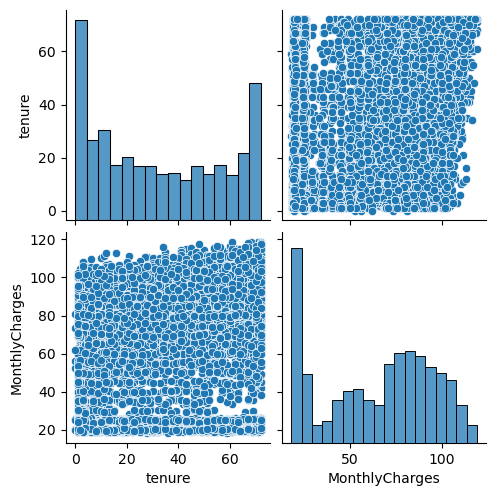

In [11]:
sns.pairplot(data)

# Data Preprocessing

In [12]:
data1=churn_data.drop(columns=['customerID','gender','SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
data1.columns

Index(['tenure', 'PhoneService', 'OnlineBackup', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le_tenure= LabelEncoder()
le_PhoneService = LabelEncoder()
le_OnlineBackup= LabelEncoder()
le_MonthlyCharges=LabelEncoder()
le_TotalCharges=LabelEncoder()
le_Churn=LabelEncoder()



In [14]:
data1['tenure_n']= le_tenure.fit_transform(data1['tenure'])
data1['PhoneService_n']= le_PhoneService.fit_transform(data1['PhoneService'])
data1['OnlineBackup_n']= le_OnlineBackup.fit_transform(data1['OnlineBackup'])
data1['MonthlyCharges_n']= le_MonthlyCharges.fit_transform(data1['MonthlyCharges'])
data1['TotalCharges_n']= le_TotalCharges.fit_transform(data1['TotalCharges'])
data1['Churn_n']= le_Churn.fit_transform(data1['Churn'])


In [15]:
data1

,tenure,PhoneService,OnlineBackup,MonthlyCharges,TotalCharges,Churn,tenure_n,PhoneService_n,OnlineBackup_n,MonthlyCharges_n,TotalCharges_n,Churn_n
0,1,No,Yes,29.85,29.85,No,1,0,2,142,2505,0
1,34,Yes,No,56.95,1889.5,No,34,1,0,498,1466,0
2,2,Yes,Yes,53.85,108.15,Yes,2,1,2,436,157,1
3,45,No,No,42.30,1840.75,No,45,0,0,266,1400,0
4,2,Yes,No,70.70,151.65,Yes,2,1,0,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,No,84.80,1990.5,No,24,1,0,991,1597,0
7039,72,Yes,Yes,103.20,7362.9,No,72,1,2,1340,5698,0
7040,11,No,No,29.60,346.45,No,11,0,0,137,2994,0
7041,4,Yes,No,74.40,306.6,Yes,4,1,0,795,2660,1


In [16]:
data2=data1.drop(columns=['tenure','PhoneService','OnlineBackup','MonthlyCharges','TotalCharges','Churn'])
data2

,tenure_n,PhoneService_n,OnlineBackup_n,MonthlyCharges_n,TotalCharges_n,Churn_n
0,1,0,2,142,2505,0
1,34,1,0,498,1466,0
2,2,1,2,436,157,1
3,45,0,0,266,1400,0
4,2,1,0,729,925,1
...,...,...,...,...,...,...
7038,24,1,0,991,1597,0
7039,72,1,2,1340,5698,0
7040,11,0,0,137,2994,0
7041,4,1,0,795,2660,1


# Classification task

In [17]:
from sklearn.model_selection import train_test_split
X = data2.drop(['PhoneService_n','OnlineBackup_n'], axis=1)
X.head()

y = data2['Churn_n']
y.head()



0    0
1    0
2    1
3    0
4    1
Name: Churn_n, dtype: int32

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [20]:
model.fit(data2,y)

DecisionTreeClassifier()

In [21]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_n, Length: 7043, dtype: int32

In [22]:
model.score(data2,y)

1.0

In [23]:
model.predict([[10,1,0,300,1000,1]])

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
model.predict

<bound method BaseDecisionTree.predict of DecisionTreeClassifier()>

In [36]:
model.accuracy(data2)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'accuracy'

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score)

<function accuracy_score at 0x0000012DDAEF7420>


# Linear regression

In [27]:
housing=pd.read_csv(r"C:\Users\admin\Desktop\ML\Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
housing.replace("?", np.nan, inplace=True)

In [29]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [30]:
housing.dropna(inplace=True, axis=0)

In [31]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [33]:
housing["price"] = housing["price"].astype(np.int64)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


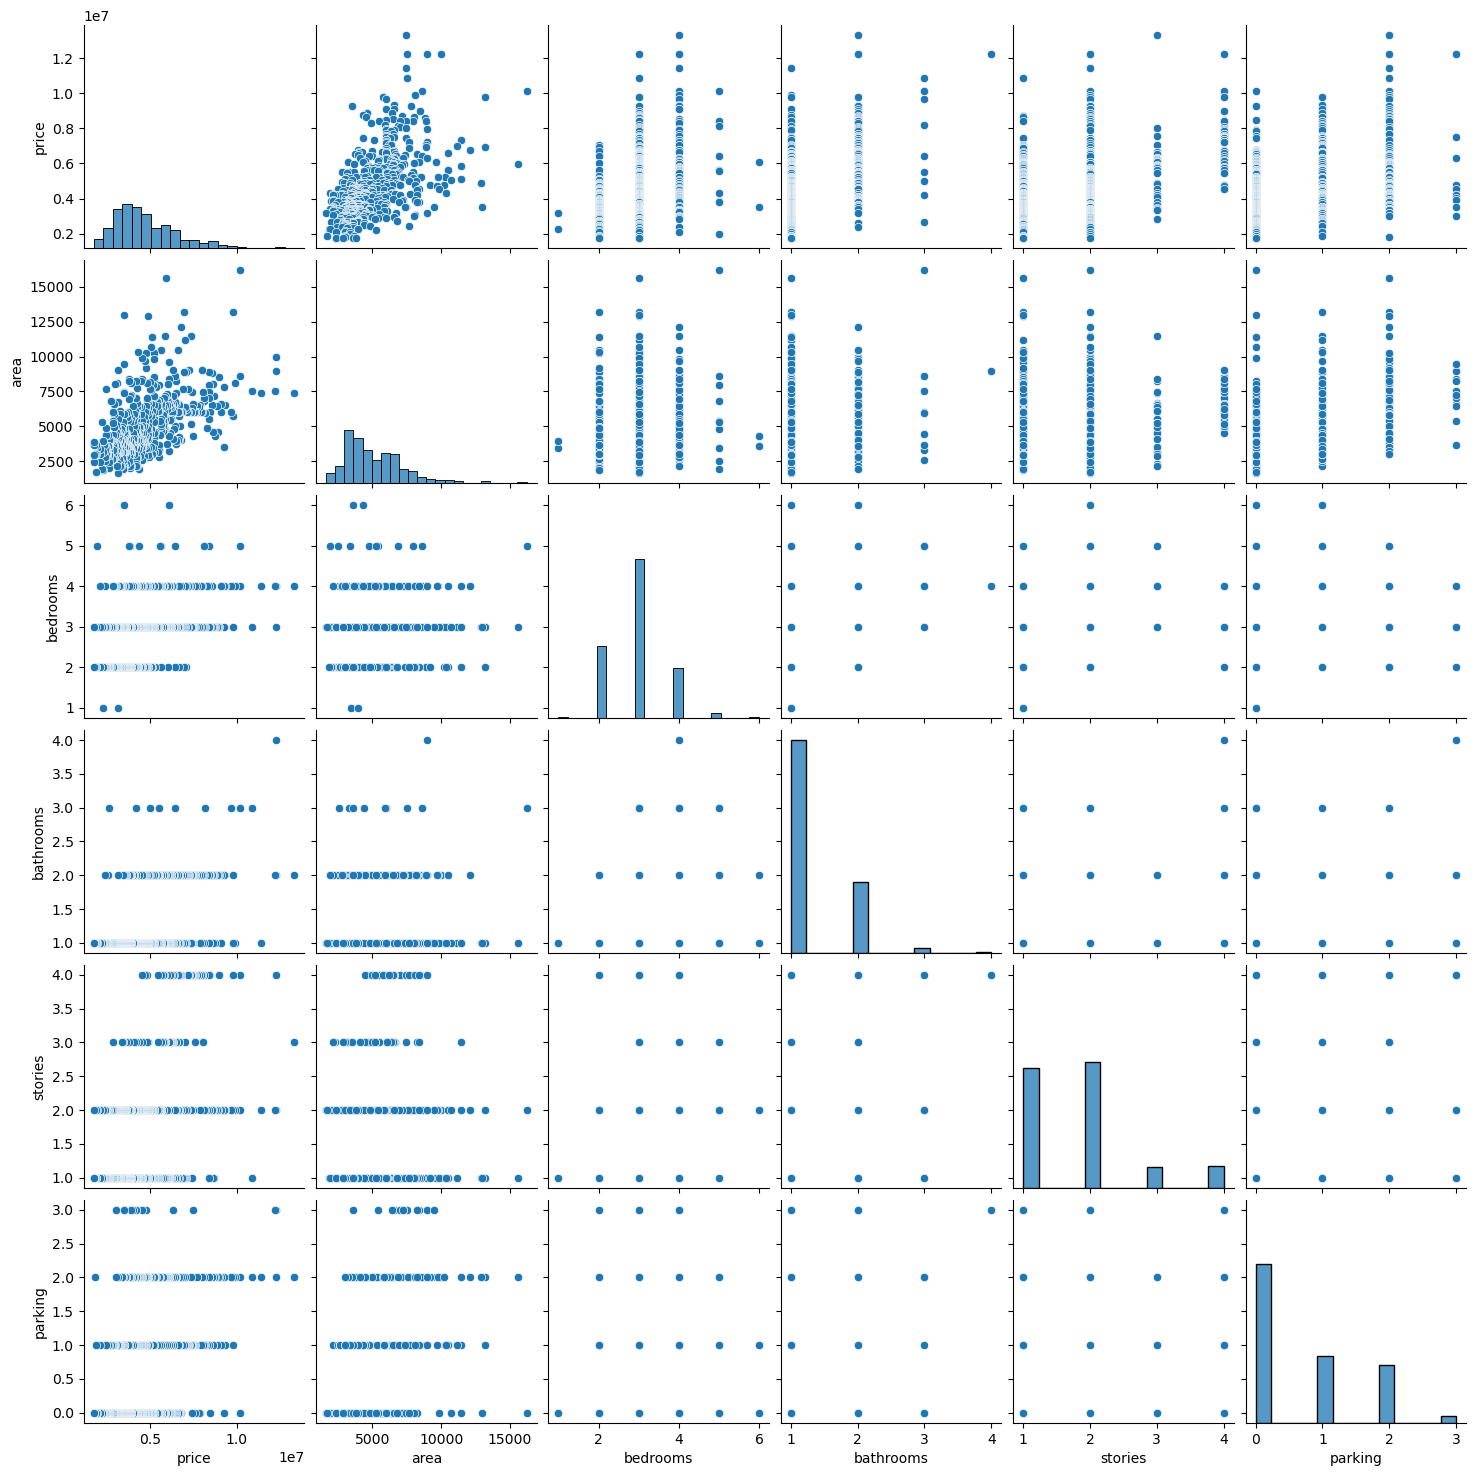

In [39]:
team_df = housing[['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
sns.pairplot(team_df)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [43]:
xvalues= np.array(housing['area']).reshape(-1,1)
yvalues= np.array(housing['price']).reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(xvalues,yvalues,test_size=.30)

In [44]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred= reg.predict(x_test)

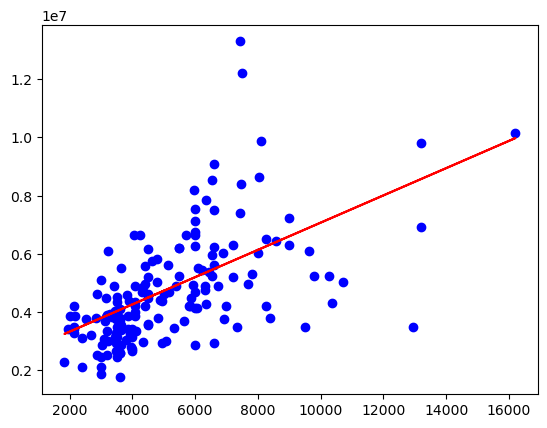

In [46]:
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='r')
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test,y_pred)
print(r2)

0.32366377094988874
